In [ ]:
!apt-get -q -y install sudo file mecab libmecab-dev mecab-ipadic-utf8 git curl python-mecab > /dev/null
!git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git > /dev/null 
!echo yes | mecab-ipadic-neologd/bin/install-mecab-ipadic-neologd -n > /dev/null 2>&1
!pip install mecab-python3 > /dev/null

# シンボリックリンクによるエラー回避
!ln -s /etc/mecabrc /usr/local/etc/mecabrc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install mecab-python3
!pip install japanize-matplotlib
!pip install venn

from wordcloud import WordCloud
import MeCab
import matplotlib.pyplot as plt
import japanize_matplotlib #日本語化matplotlib
import collections
import venn
import datetime as dt
import seaborn as sns

sns.set(font="IPAexGothic") #日本語フォント設定
!apt-get -y install fonts-ipafont-gothic #日本語フォントのインストール

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('./drive/MyDrive/サブゼミ/taberogu2.csv')
taberogu = df['口コミ'].values

In [ ]:
df

,口コミ
0,(' 2020年12月平日8:00往訪。8:30開店に対して30分前到着、...
1,(' 【讃岐うどん がもう】さん…Tabelog Award 2021 B...
2,(' 初訪折角、四国まで来たので16年振りに饂飩巡りをしてみる事にしました...
3,(' Instagram\xa0 \xa0 pateknautilus40...
4,(' 山下うどん(坂出)からとても近い場所にあるので、もちろん梯子して蒲生...
...,...
91,(' 香川県に来てしまいました！ひと月ほどうどん絶ちして臨んだ、この旅。第...
92,(' 本日も、朝から讃岐うどん巡りまずは車を走らせ、こちらのお店へこちらは...
93,(' ブログからの投稿なので読みづらい部分が多数ございます興味がある方はブ...
94,(' 青春18切符で香川へのうどん巡礼二日目。今度は鴨川駅から歩いて1km...


In [ ]:
mecab = MeCab.Tagger('-Ochasen')
mecab.parse('')

'EOS\n'

In [ ]:
node = mecab.parseToNode(taberogu[1])

In [ ]:
output = []
while node:
  word_type = node.feature.split(',')[0]
  if word_type in ['名詞', '形容詞', '副詞', '動詞']:
    output.append(node.surface.upper())
  node = node.next
print(output)

["('", '讃岐', 'うどん', 'もう', 'さん', 'TABELOG', 'AWARD', '2021', 'BRONZE', '受賞', '全国', '１', '番', '人気', '讃岐', 'うどん', '(#^.^#)', '高松', '市内', '車', '向かい', '♪', '17', 'キロ', '40', '分', '程度', '掛かり', '割', '遠い', '(^', 'O', '^)', '丿', '駐車', '場', '広い', 'の', '嬉しい', '店内', '手前', 'カウンター', '越し', 'うどん', 'サイズ', '注文', '受け取り', 'その後', '目', '前', '広がる', 'トッピング', '選ぶ', 'システム', '時', '料金', '払い', '店内', '席', '数', '席', 'あり', '少ない', '直ぐ', '満席', 'なっ', 'い', '外', 'イス', '着席', '出来れ', 'ラッキー', '雨', '降っ', '相当', '大変', 'そう', '緊急', '避難', '的', '車中', '食べる', 'の', '良い', '(', '笑', ')', '今回', 'うどん', '小', '温', '卵黄', 'シンプル', '腰', 'ある', '太', '麺', 'モッチモチ', 'し', 'とても', '美味', '美味', '人気', 'NO', '.', '1', 'の', '納得', '(●＾', 'O', '＾●)', '美味し', 'ゅうございますねそしてうどん', '冷', '揚げ', 'さん', 'コロッケ', '冷', '更に', 'コシ', '楽しめ', 'テンション', '上がり', '⤴', 'うどん', 'ツアー', '１', '３', '軒', '中', '好み', 'TOP', '４', '軒', '入り', '再訪', 'する', '時', 'こちら', '讃岐', 'うどん', '楽しみ', '思い', '(≧▽≦)/～♡', "',)"]


In [ ]:
text = ' '.join(output)
text

"(' 讃岐 うどん もう さん TABELOG AWARD 2021 BRONZE 受賞 全国 １ 番 人気 讃岐 うどん (#^.^#) 高松 市内 車 向かい ♪ 17 キロ 40 分 程度 掛かり 割 遠い (^ O ^) 丿 駐車 場 広い の 嬉しい 店内 手前 カウンター 越し うどん サイズ 注文 受け取り その後 目 前 広がる トッピング 選ぶ システム 時 料金 払い 店内 席 数 席 あり 少ない 直ぐ 満席 なっ い 外 イス 着席 出来れ ラッキー 雨 降っ 相当 大変 そう 緊急 避難 的 車中 食べる の 良い ( 笑 ) 今回 うどん 小 温 卵黄 シンプル 腰 ある 太 麺 モッチモチ し とても 美味 美味 人気 NO . 1 の 納得 (●＾ O ＾●) 美味し ゅうございますねそしてうどん 冷 揚げ さん コロッケ 冷 更に コシ 楽しめ テンション 上がり ⤴ うどん ツアー １ ３ 軒 中 好み TOP ４ 軒 入り 再訪 する 時 こちら 讃岐 うどん 楽しみ 思い (≧▽≦)/～♡ ',)"

In [ ]:
wordcloud_df = pd.DataFrame(output,columns=['word'])
wordcloud_df['count'] = 1
wordcloud_df = wordcloud_df.groupby('word').sum()
wordcloud_df = wordcloud_df.sort_values('count', ascending=False)
wordcloud_df = wordcloud_df.reset_index()

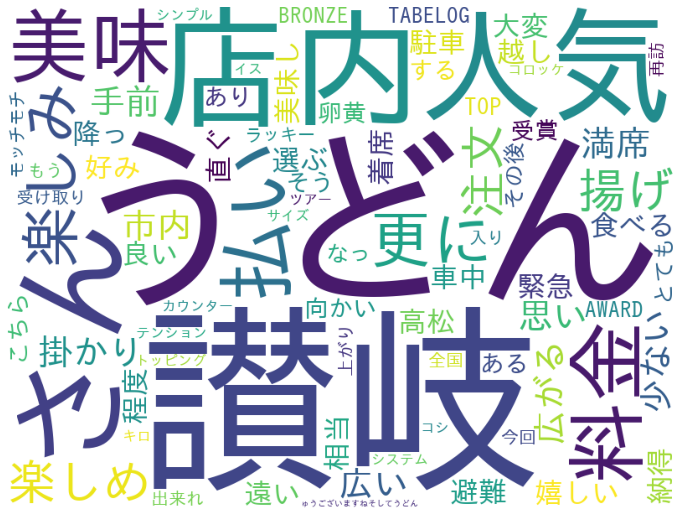

In [ ]:
fpath = '/usr/share/fonts/truetype/fonts-japanese-gothic.ttf'
wordcloud = WordCloud(background_color="white",
                      font_path = fpath,
                      width = 800,
                      height = 600,
                      collocations = False).generate(" ".join(wordcloud_df['word']))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.axis("off") #メモリの非表示
plt.show()